In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples


In [2]:
df = pd.read_csv('wine.csv')

In [3]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Ignoring "Type" column

In [6]:
df=df.drop('Type',axis=1)

## EDA

In [7]:
df.shape

(178, 13)

In [8]:
df.isnull().sum()

Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [10]:
df.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [12]:
df.isnull().sum().value_counts()

0    13
dtype: int64

In [13]:
df.duplicated().sum()


0

In [14]:
df.skew()


Alcohol           -0.051482
Malic              1.039651
Ash               -0.176699
Alcalinity         0.213047
Magnesium          1.098191
Phenols            0.086639
Flavanoids         0.025344
Nonflavanoids      0.450151
Proanthocyanins    0.517137
Color              0.868585
Hue                0.021091
Dilution          -0.307285
Proline            0.767822
dtype: float64

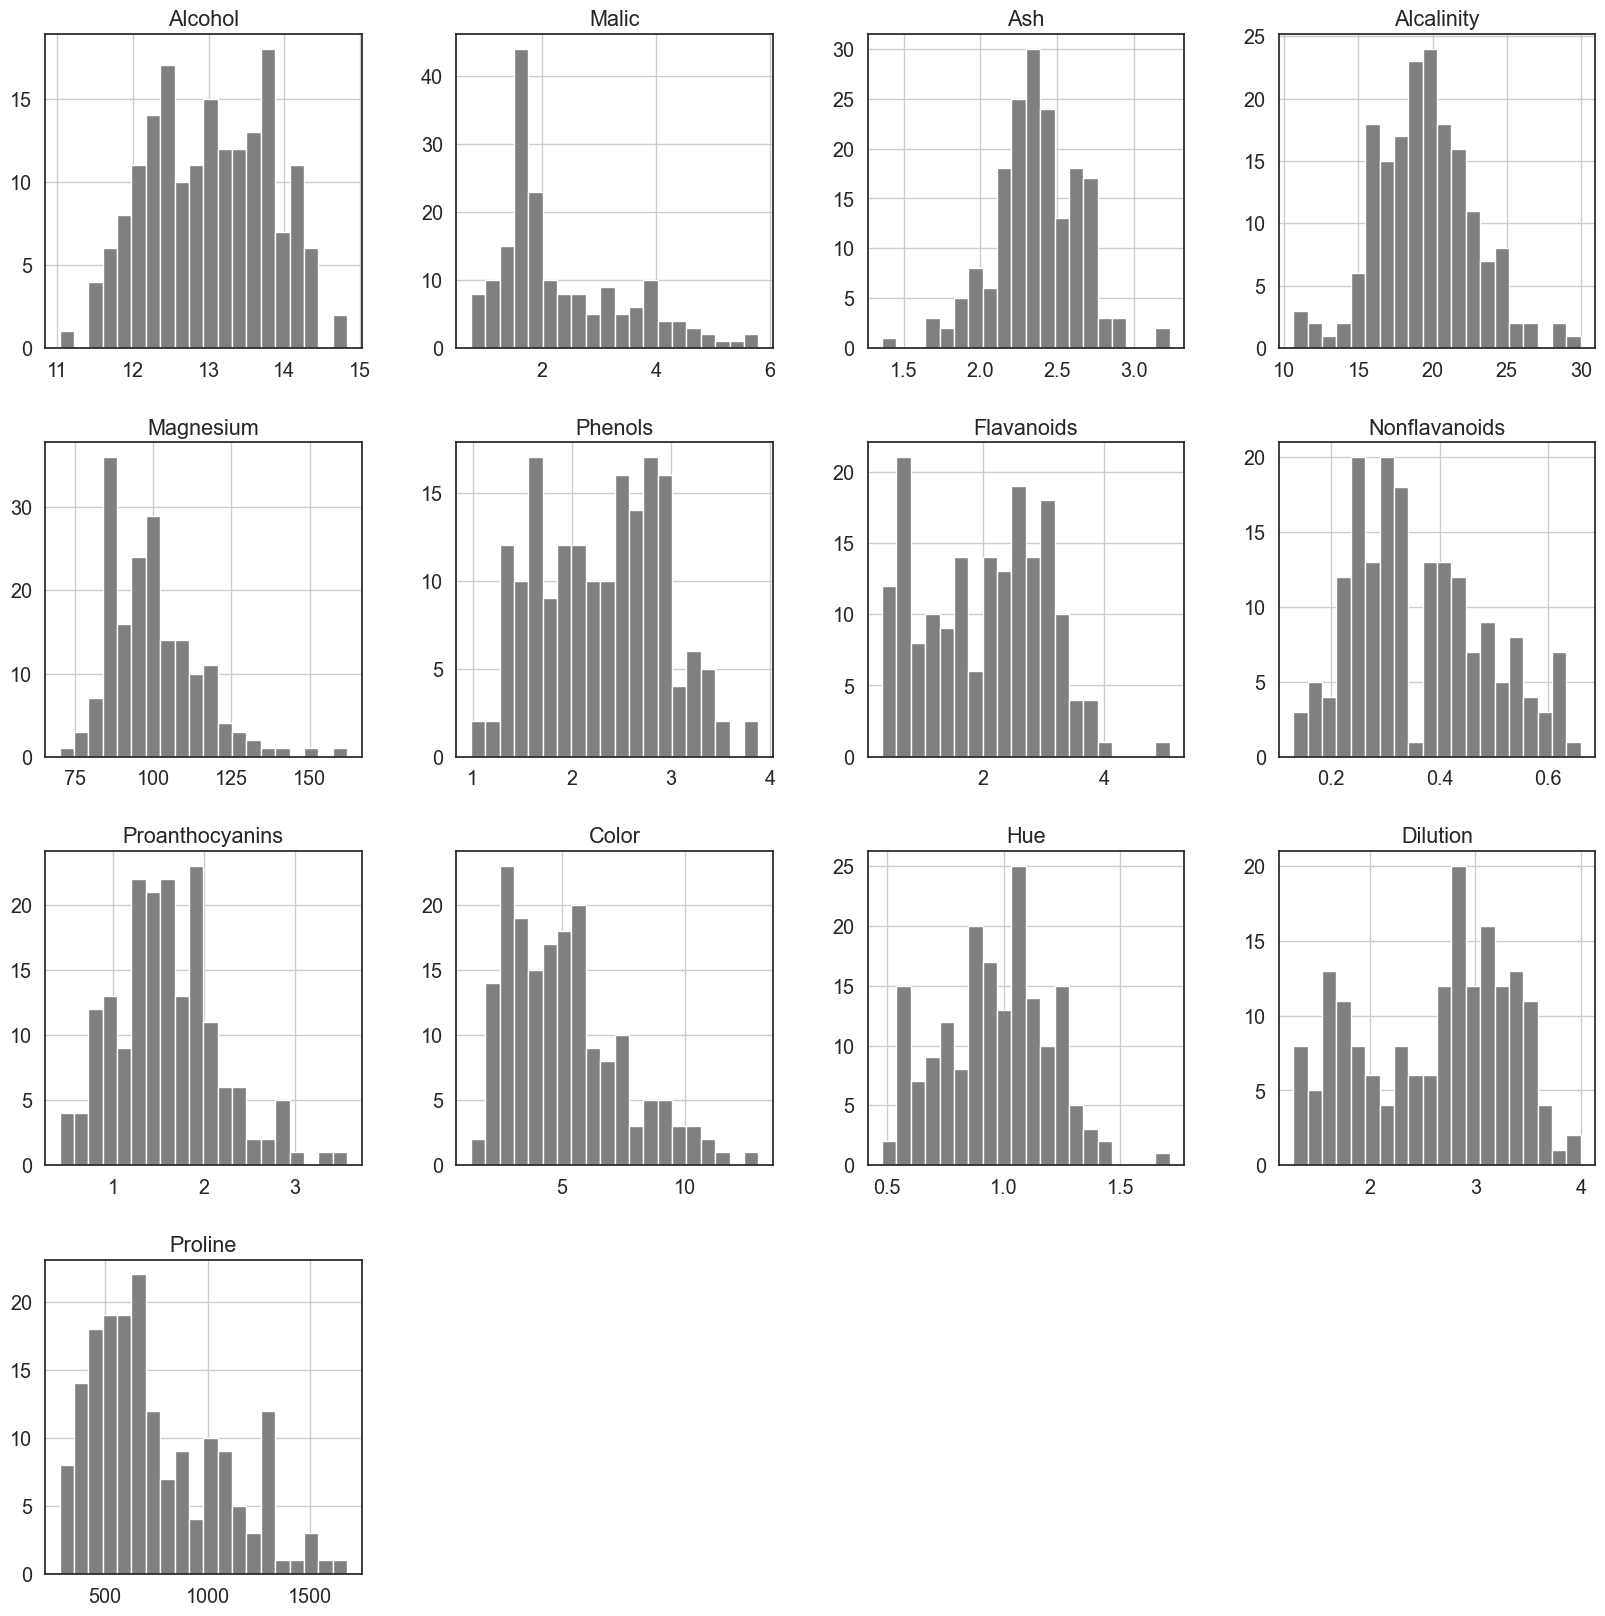

In [22]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=df.hist(bins=20,color='grey' )

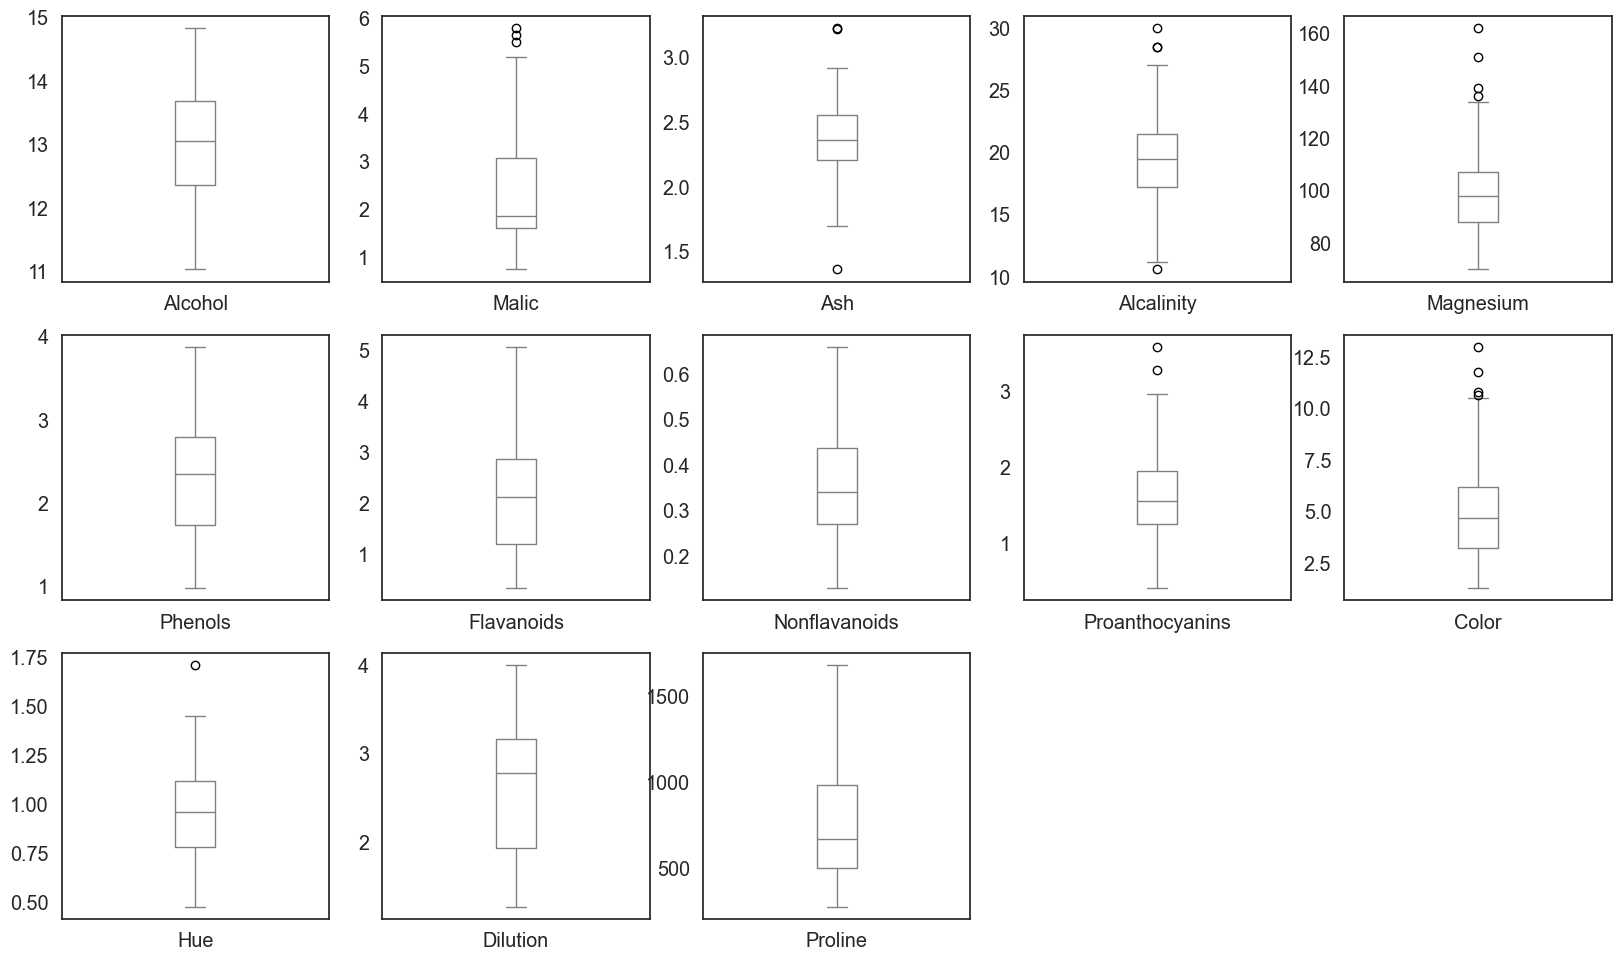

In [34]:
df.plot( kind = 'box', subplots = True, layout = (5,5),color='grey')
plt.show()

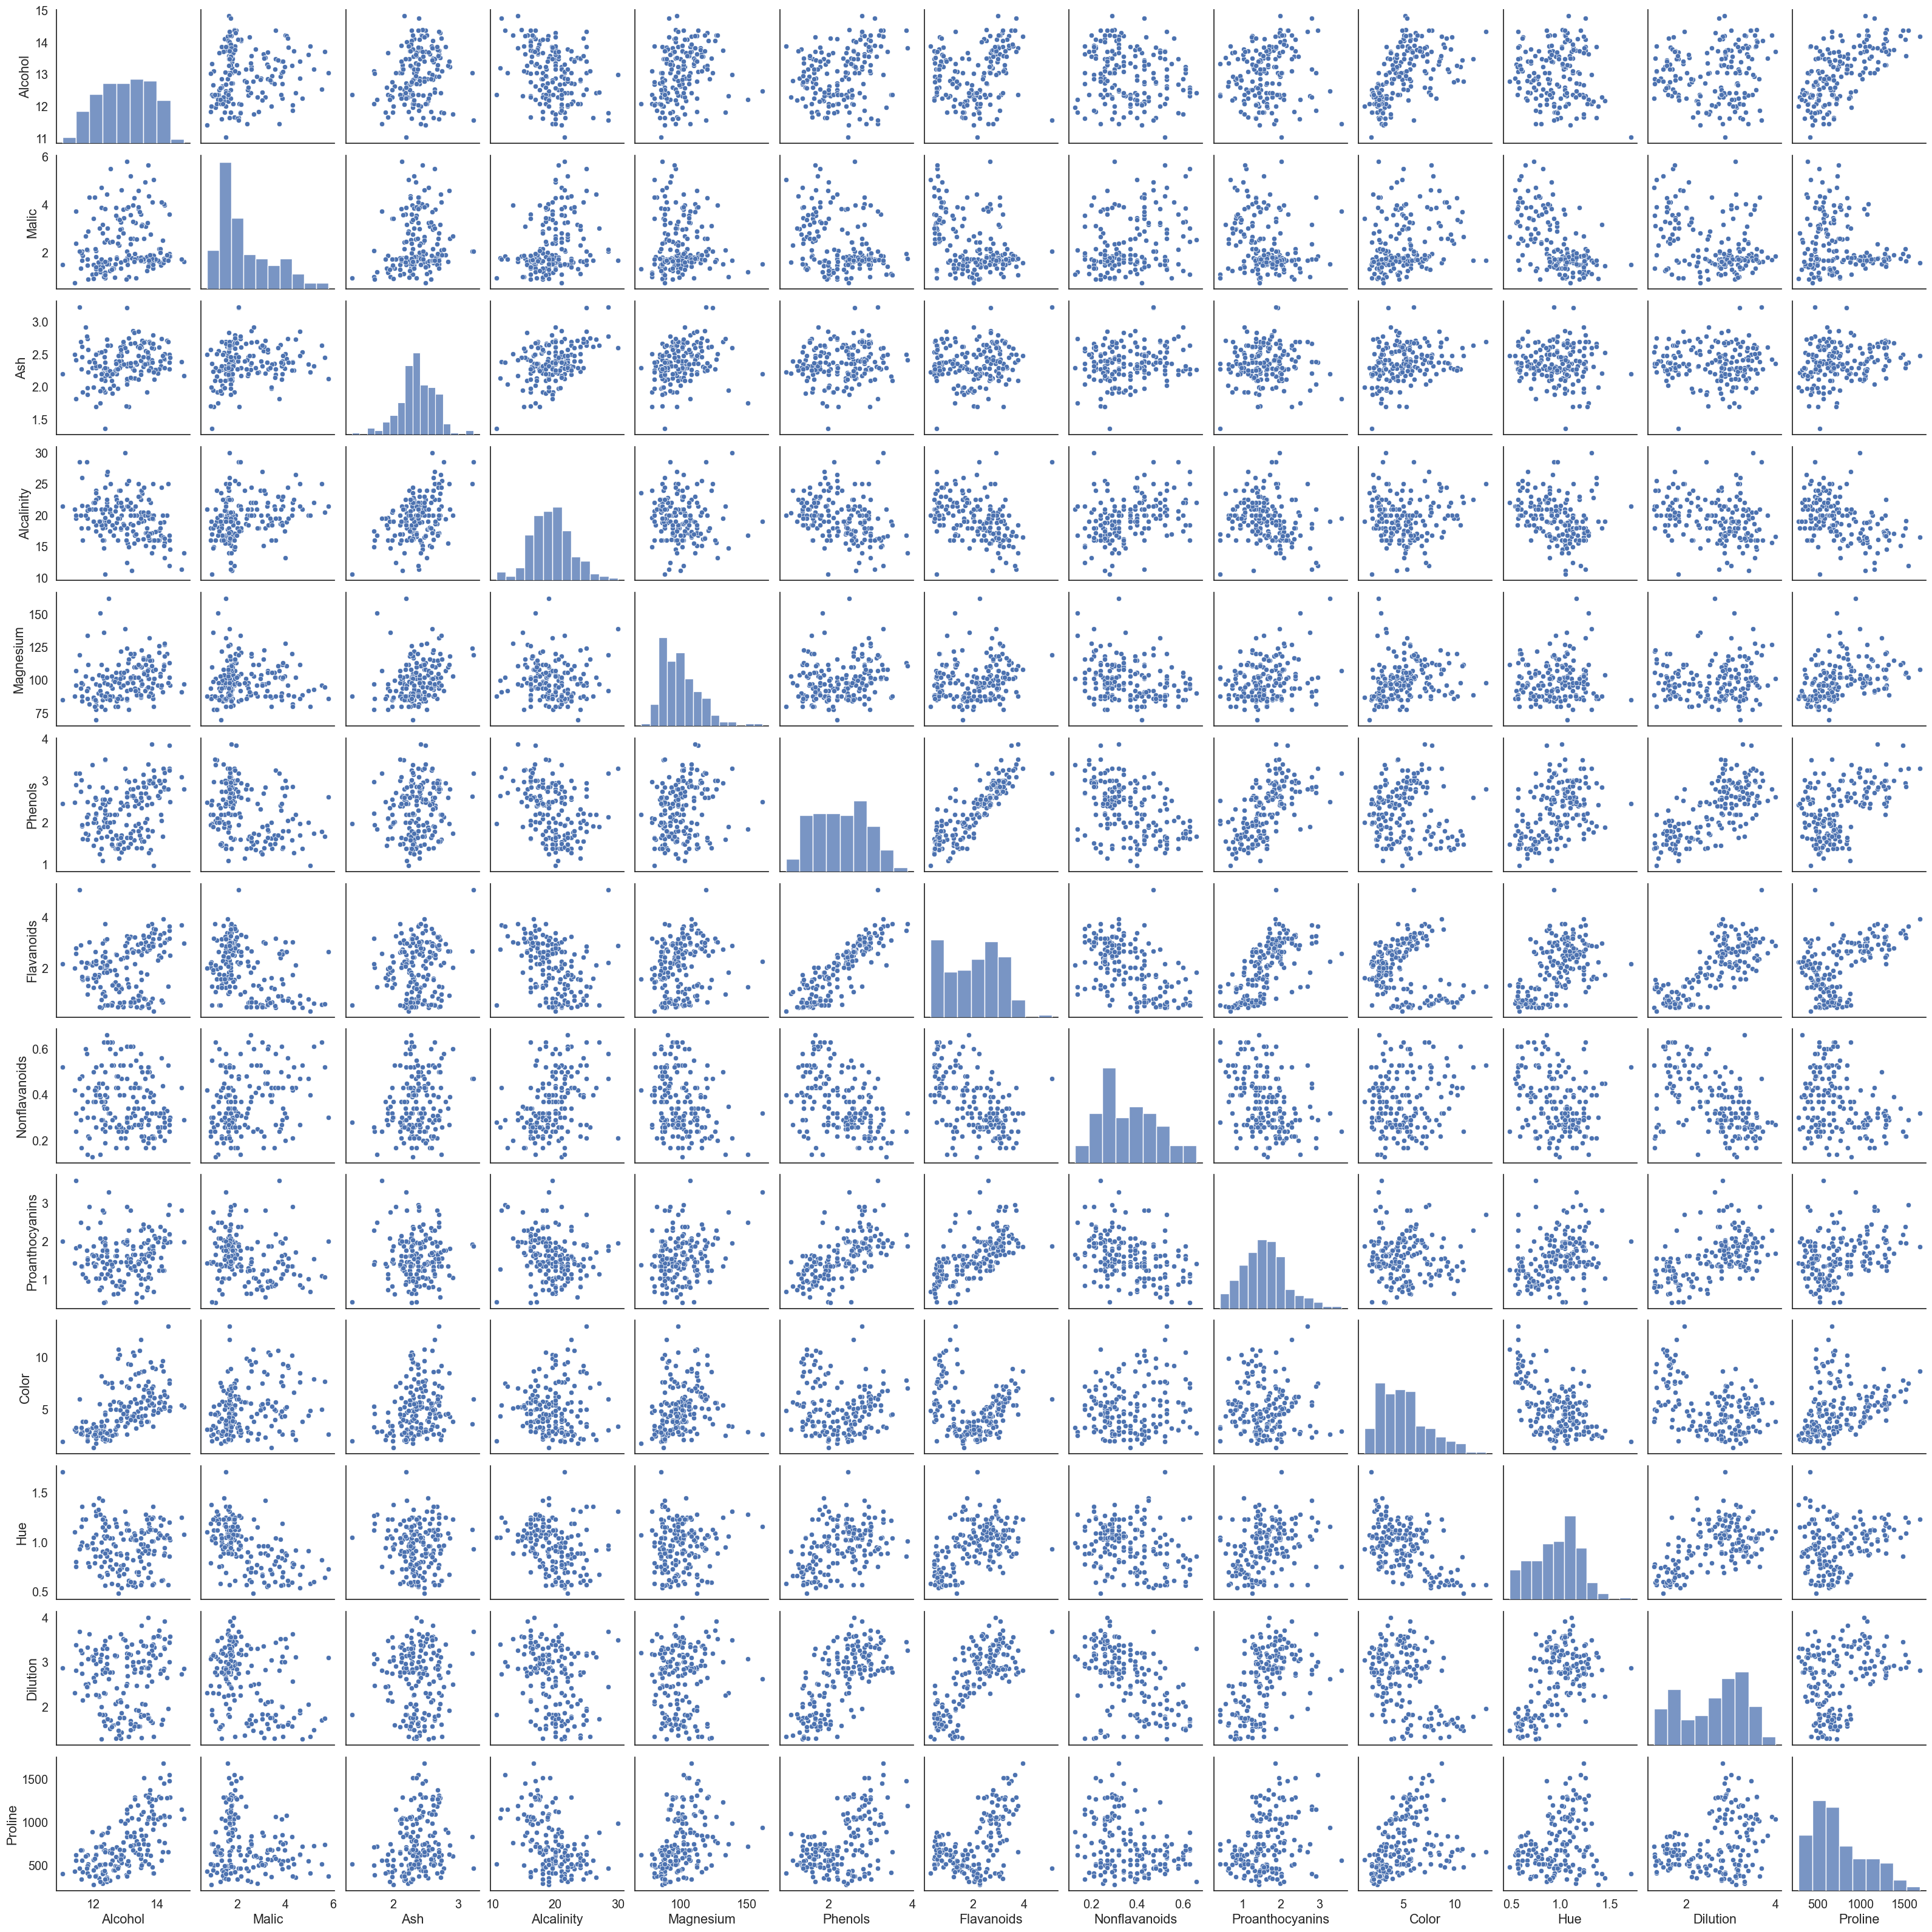

In [38]:
sns.pairplot(df)

In [39]:
corr = df.corr()

<AxesSubplot:>

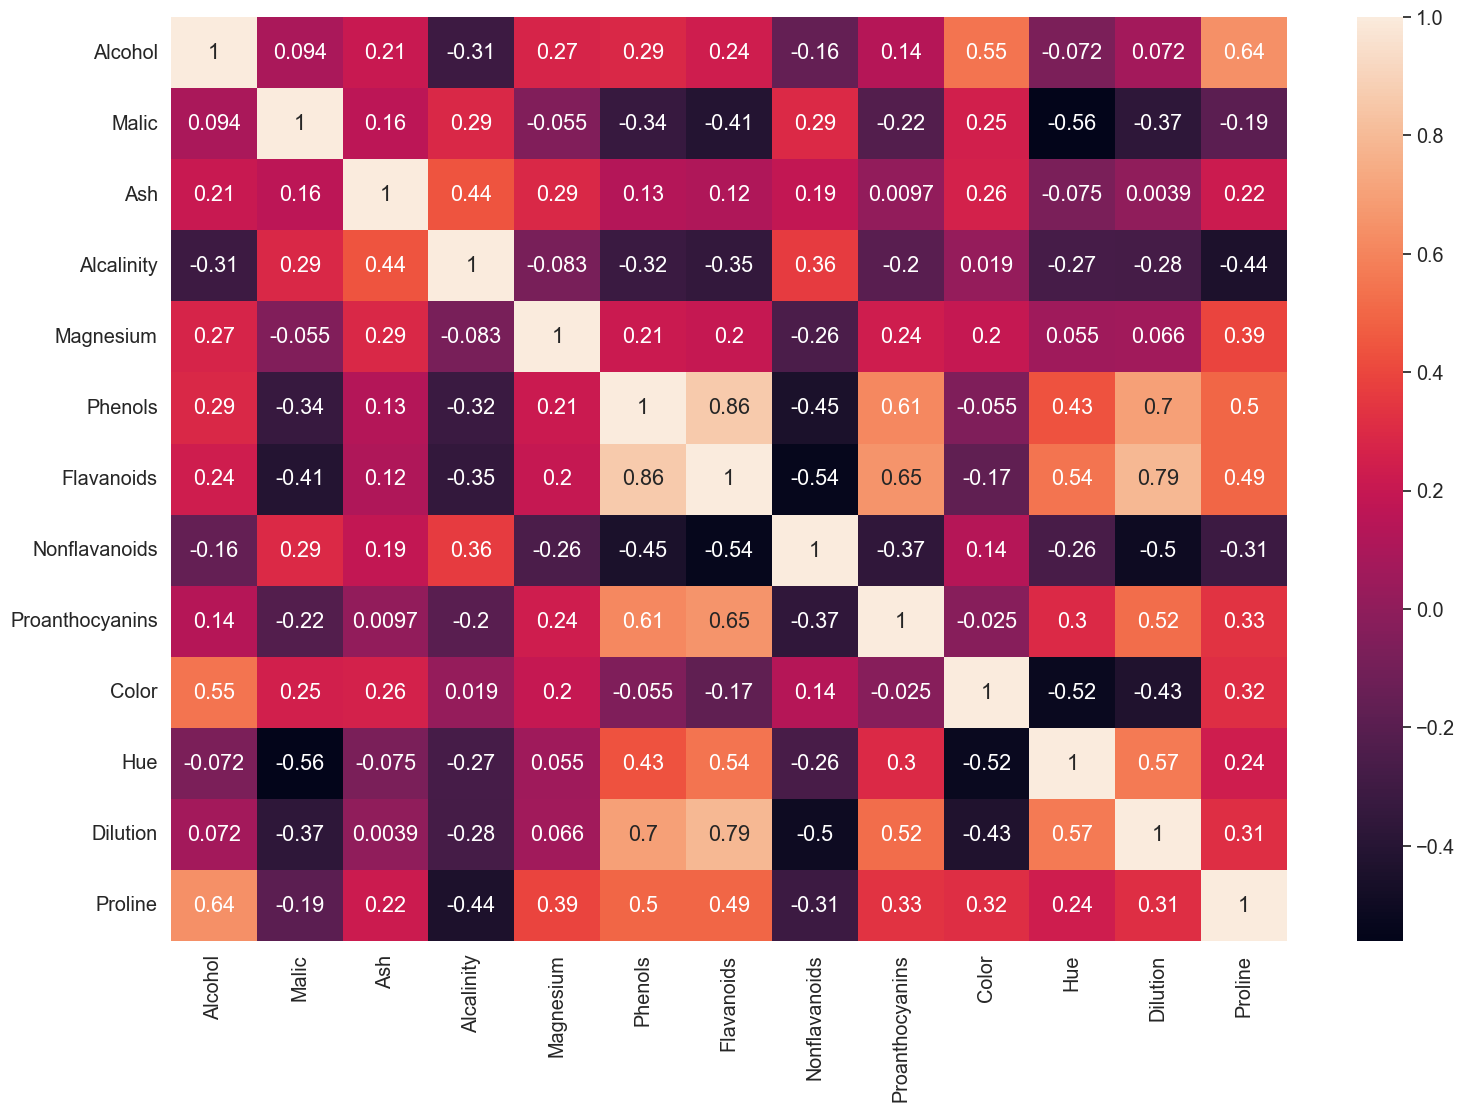

In [43]:
plt.subplots(figsize=(18,12))
sns.heatmap(corr, annot=True)

#### Unique points in this correlation matrix:

Phenols is positively correlated with Flavanoids, Dilution and Proanthocyanins

Flavanoids is positively correlated with Proanthocyanins and Dilution

Dilution is positively correlated with Hue

Alcohol is positively correlated with Proline

#### Data preprocessing

In [44]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_s = ss.fit_transform(df)

In [46]:
df_s.shape

(178, 13)

In [48]:
df_s

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# PCA

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_s = pca.fit_transform(df_s)

In [51]:
pca_s.shape

(178, 3)

In [52]:
pca_df = pd.DataFrame(data = pca_s, columns = ['PC1', 'PC2','PC3'])


In [53]:
pca_df

,PC1,PC2,PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


# Clustering 
## KMeans

In [71]:
from sklearn.cluster import KMeans
aa = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(pca_df)
    aa.append(km.inertia_)

In [72]:
aa

[1539.5034801883096,
 886.161136482352,
 513.0564645910786,
 429.62808190874875,
 371.2927474386227,
 327.5612393670484,
 291.71254076119817,
 262.8091265354726,
 234.00986375507443,
 213.8706126047457]

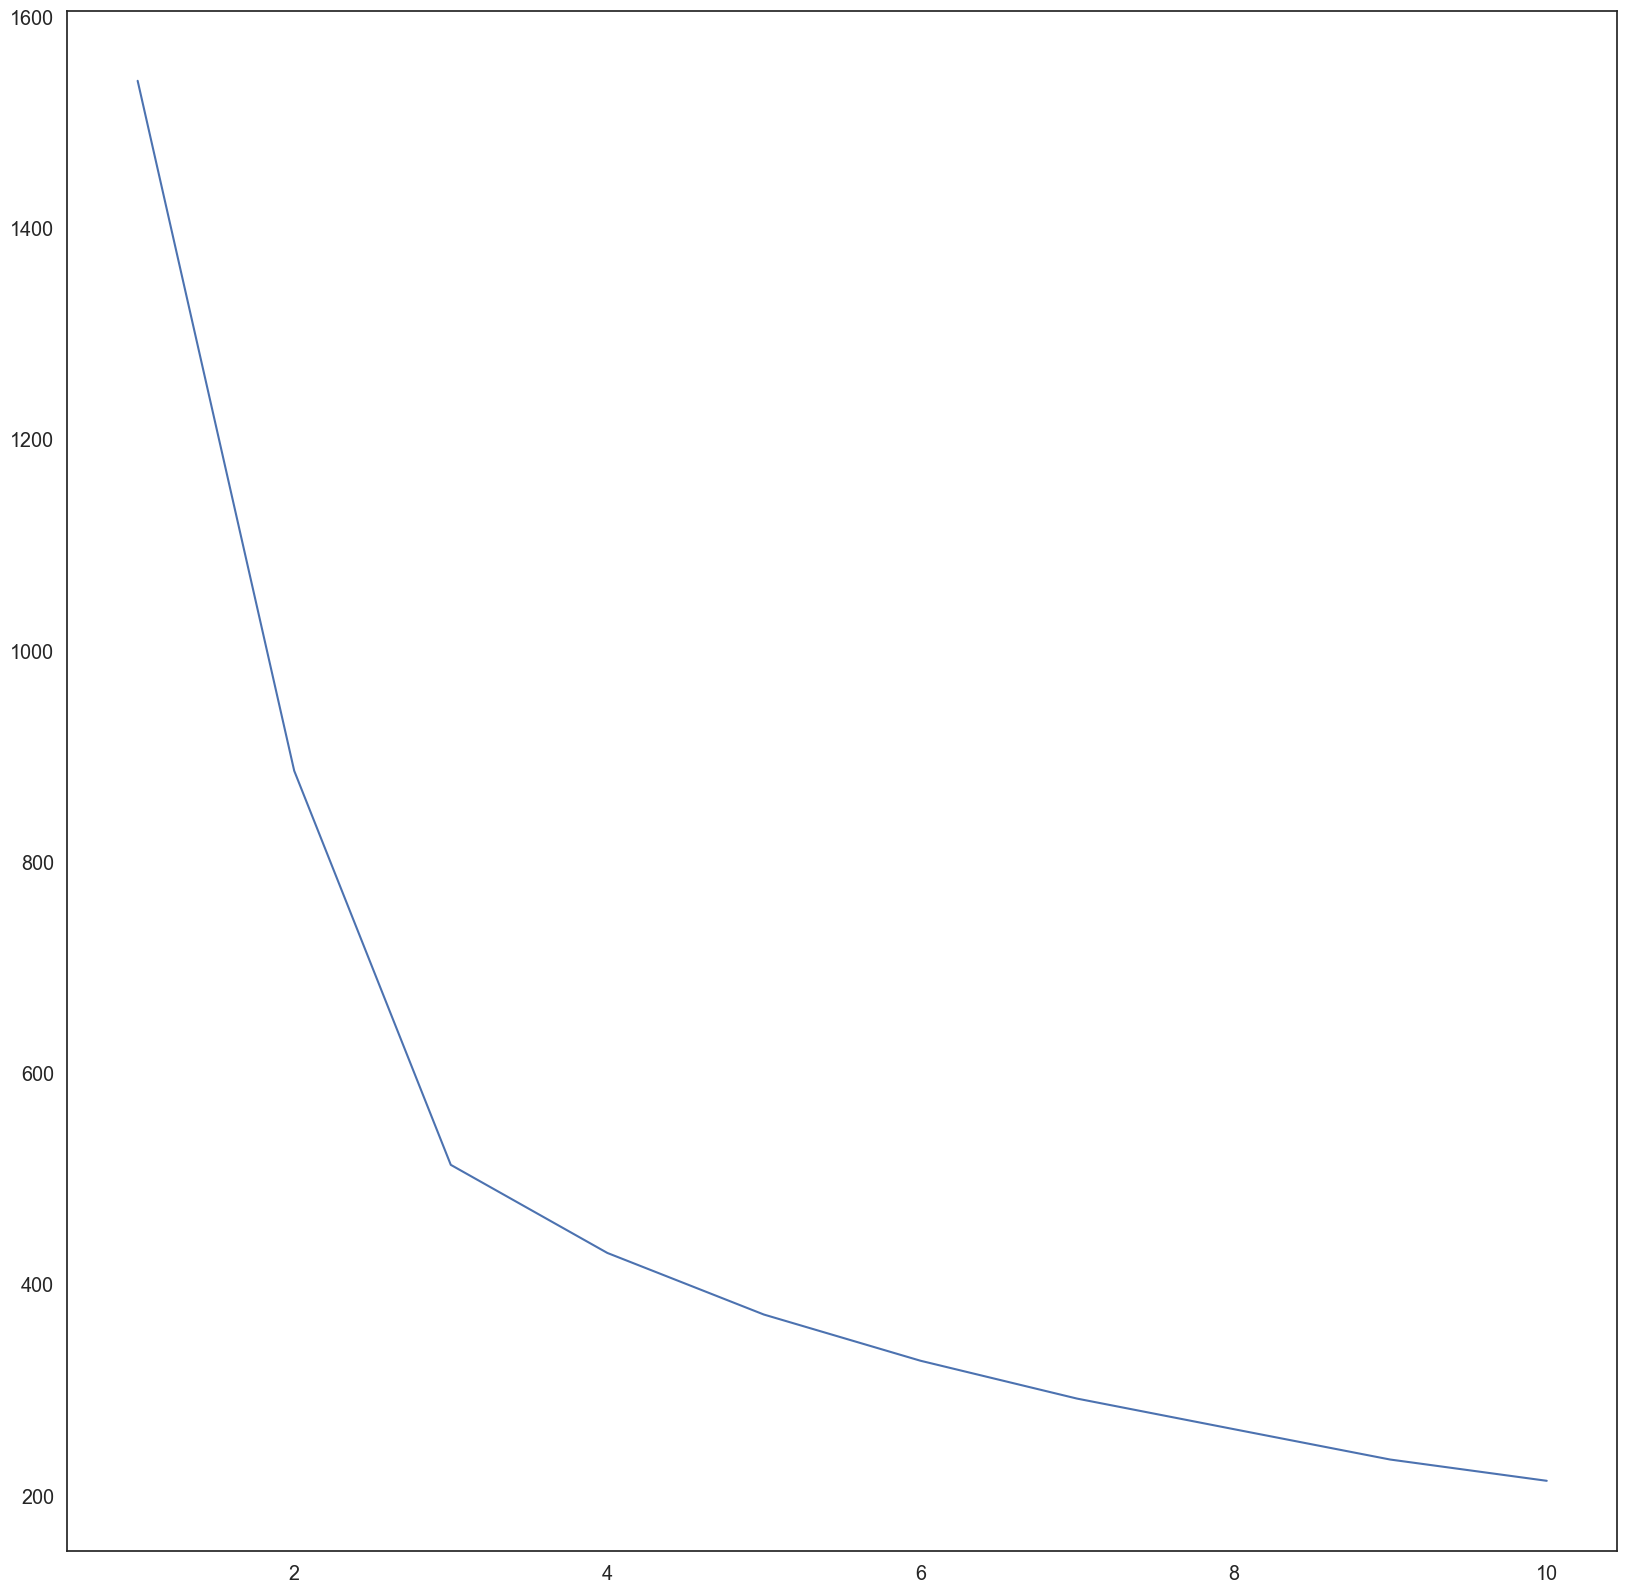

In [73]:
plt.plot(range(1,11),aa)

#### The optimal clusters can be very much 3

In [96]:
km = KMeans(n_clusters=3)
label = km.fit_predict(pca_df)

In [99]:
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [169]:
n_clusters = [2,3,4,5,6,7,8]

for n in n_clusters:
    km = KMeans(n_clusters = n)
    ss = km.fit_predict(pca_df)
    sill = silhouette_score(pca_df, ss)
    print("for n_clusters = ", n ,'the silhouette score is',sill)
    

for n_clusters =  2 the silhouette score is 0.38938813089003277
for n_clusters =  3 the silhouette score is 0.45379998482576134
for n_clusters =  4 the silhouette score is 0.4110296819768857
for n_clusters =  5 the silhouette score is 0.3597762600861264
for n_clusters =  6 the silhouette score is 0.3128535154706276
for n_clusters =  7 the silhouette score is 0.33060840981889134
for n_clusters =  8 the silhouette score is 0.28328907820074256


#### we are getting highest silhouette score at cluster= 3

In [104]:
df1 = df

In [105]:
df1["Cluster_Label"] = label

In [106]:
df1

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster_Label
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [108]:
df1['Cluster_Label'].value_counts()

2    65
0    62
1    51
Name: Cluster_Label, dtype: int64

In [111]:
df1.groupby("Cluster_Label").mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Cluster_Label,,,,,,,,,,,,,
0,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
1,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
2,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231


In [117]:
ref = pd.read_csv('wine.csv')
ref['Type'].unique()

array([1, 2, 3])

### As we can see the "Type" column had 3 types meaning three clusters this we have optained 3 clusters using KMeans elbow method, which implies the original data and the PCA applied data have equal number of clusters as per KMeans Clustering.

## Hierarchical CLustering

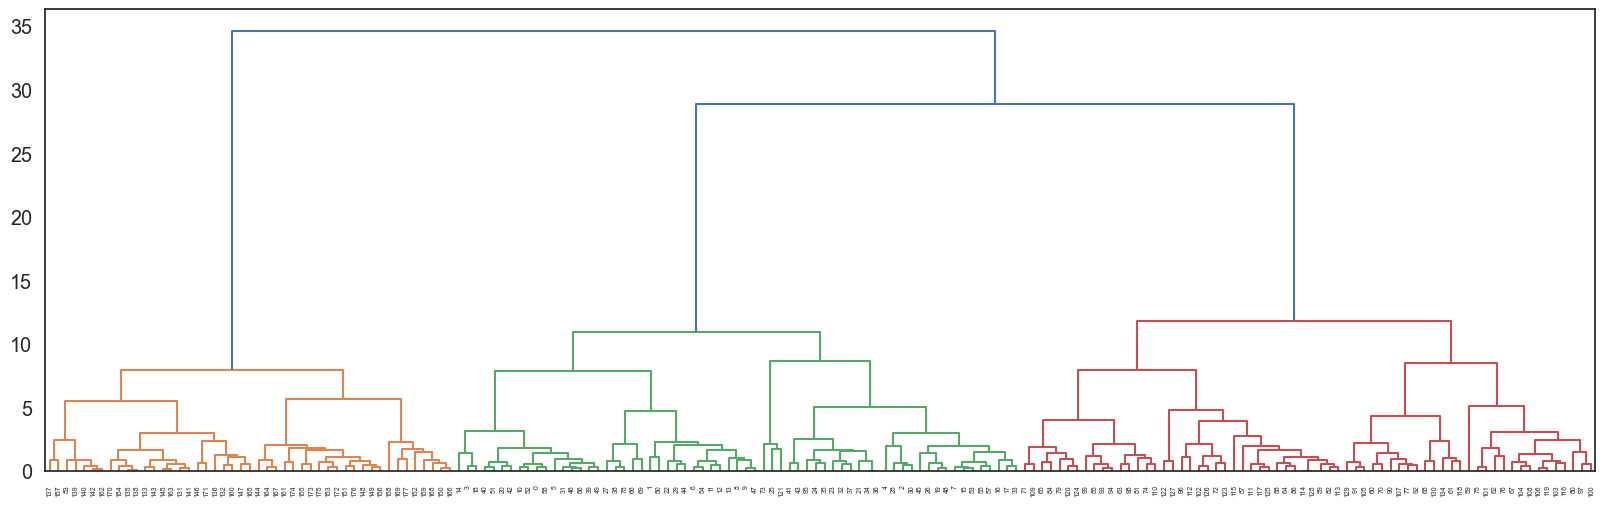

In [124]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

plt.figure(figsize =(20, 6)) 
dend = sch.dendrogram(sch.linkage(pca_df, method='ward'))

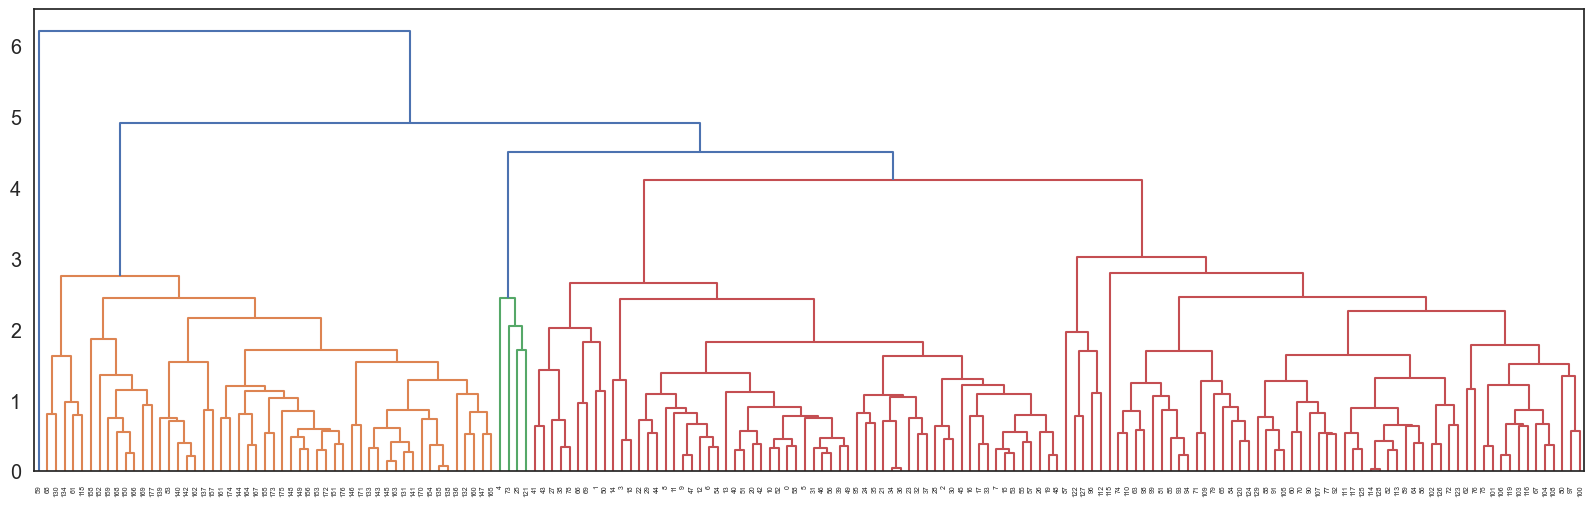

In [170]:
plt.figure(figsize =(20, 6)) 
dend = sch.dendrogram(sch.linkage(pca_df, method='average'))

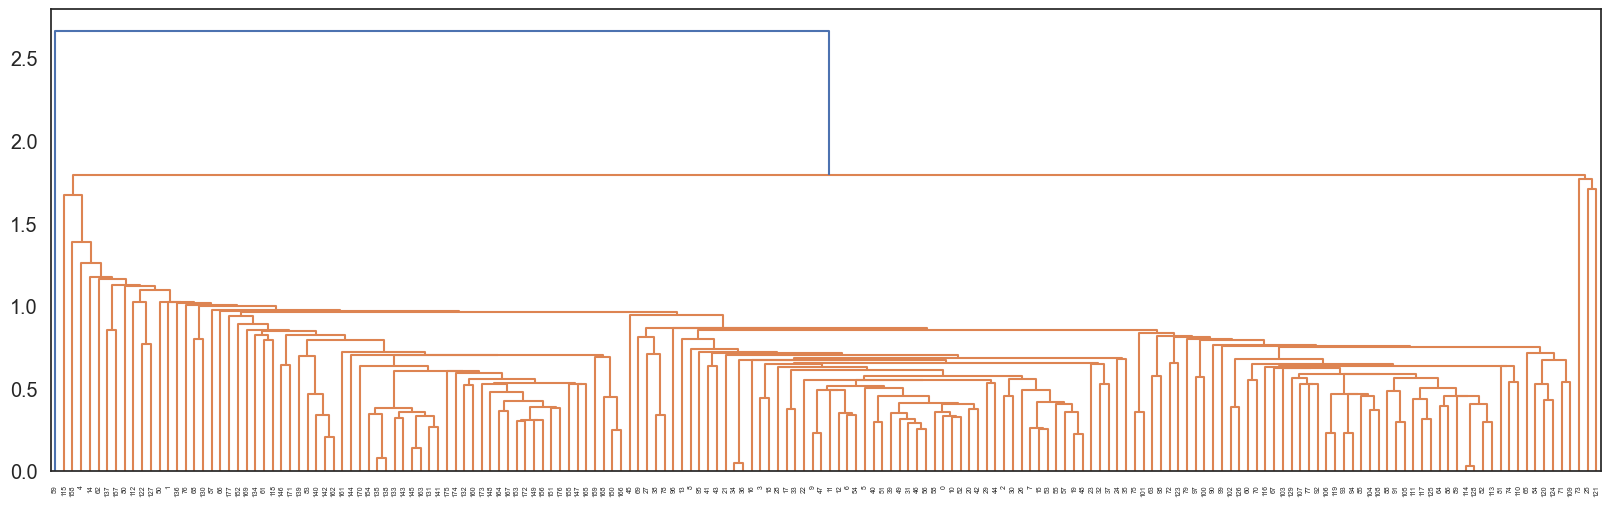

In [171]:
plt.figure(figsize =(20, 6)) 
dend = sch.dendrogram(sch.linkage(pca_df, method='single'))

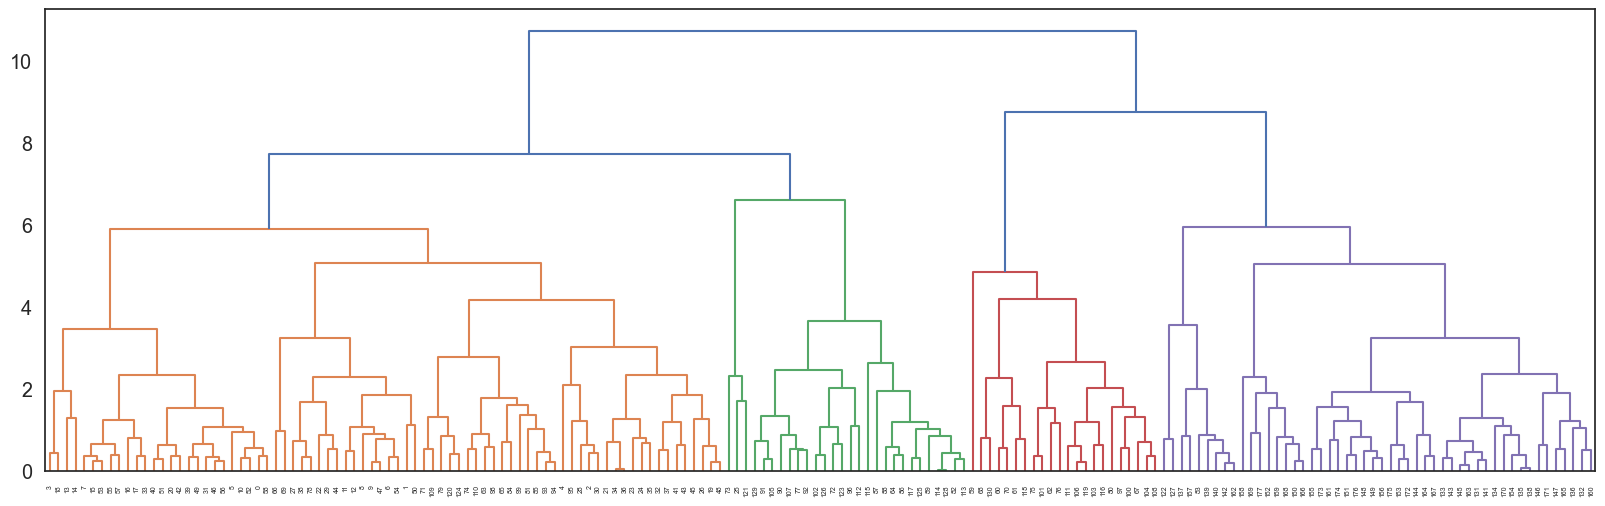

In [172]:
plt.figure(figsize =(20, 6)) 
dend = sch.dendrogram(sch.linkage(pca_df, method='complete'))

we can see that optimal number of clusters from dendrogram is 3

In [156]:
hac = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage='ward')

In [157]:
hac

AgglomerativeClustering(n_clusters=3)

In [158]:
label2 = hac.fit_predict(pca_df)

In [159]:
label2

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [160]:
n_clusters = [2,3,4,5,6,7]
for n in n_clusters:
    hac = AgglomerativeClustering(n_clusters=n, affinity="euclidean", linkage='ward')
    xx = hac.fit_predict(pca_df)
    sil = silhouette_score(pca_df, xx)
    print('for n_clusters = ',n, 'the silhouette score is ',sil)

for n_clusters =  2 the silhouette score is  0.39509037225075383
for n_clusters =  3 the silhouette score is  0.4459492198062967
for n_clusters =  4 the silhouette score is  0.3819569034814439
for n_clusters =  5 the silhouette score is  0.31948816174663447
for n_clusters =  6 the silhouette score is  0.31993269879897357
for n_clusters =  7 the silhouette score is  0.2890224763575289


so our 3 clusters ae optimal

In [161]:
df2 = df
df2["Cluster_Label"] = label2

In [162]:
df2

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster_Label
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [163]:
df2["Cluster_Label"].value_counts()

0    66
2    65
1    47
Name: Cluster_Label, dtype: int64

In [166]:
df2.groupby("Cluster_Label").mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Cluster_Label,,,,,,,,,,,,,
0,12.264242,1.932121,2.245455,20.087879,91.666667,2.220152,1.991364,0.367727,1.540455,3.036364,1.042515,2.729848,504.439394
1,13.171489,3.431702,2.441064,21.595745,98.829787,1.674894,0.792979,0.452766,1.165957,7.452553,0.682979,1.702553,627.021277
2,13.624769,1.954769,2.435538,17.373846,108.600000,2.819692,2.961692,0.290154,1.949385,5.379538,1.069538,3.149077,1079.753846


### As we can see the "Type" column had 3 types meaning three clusters this we have optained 3 clusters using Dendrogram method, which implies the original data and the PCA applied data have equal number of clusters as per Heirarchical Clustering.

## Conclusion

I have applied EDA to analyze dataset.Discovered correlation between diff variables and found colinearity.

Applied Standardazation transformation on the data to use Principle componets analysis effectively.

I have used & analyzed two clustering techniques here..i) KMeans ii) Hierarchical Clusterig

The number of clusters(KMeans and Heirarchy Clustering) are equal to orignal data